<a href="https://colab.research.google.com/github/DrBart20/EksploracjaDanych/blob/main/Zaj12/zad_klasteryzacja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import euclidean, cityblock
from scipy.spatial.distance import minkowski, cosine
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import scipy.cluster.hierarchy as sch

## Zadanie 1
    
Wczytaj dane z pliku **PersonalData.csv**.
    
Oblicz odległość euklidesową \(d(A, B)\) między dwoma wybranymi rekordami \(A\) i \(B\).
    
Zmodyfikuj skalę dla atrybutu **zarobki** (przeskaluj jednostki z tysięcy na złote) i ponownie oblicz odległość euklidesową. Jak zmiana skali wpływa na wynik?
    
Aby wyeliminować wpływ skali, podziel wartość każdego atrybutu przez jego odchylenie standardowe. Oblicz ponownie odległość euklidesową dla przeskalowanych danych.
    
Dla punktów \(A\) i \(B\) oblicz także odległość Minkowskiego oraz odległość miejską (Manhattan).

In [21]:
df = pd.read_csv("PersonalData.csv", index_col=0, delimiter=",")
#print(df.head())
#print(df.columns)

df.rename(columns={'Zarobki (tys.)': 'Zarobki'}, inplace=True)
df_numeric = df.select_dtypes(include=np.number)
d_euc = euclidean(df_numeric.loc['A'], df_numeric.loc['B'])
print(f"Initial Euclidean distance: {d_euc}")

df_zarobki_scaled = df_numeric.copy()
df_zarobki_scaled['Zarobki'] = df_zarobki_scaled['Zarobki'] * 1000
#print(df_zarobki_scaled.head())
d_euc_scaled = euclidean(df_zarobki_scaled.loc['A'], df_zarobki_scaled.loc['B'])
print(f"Euclidean distance after scaling Zarobki: {d_euc_scaled}")

df_zarobki_normalized = df_numeric.copy()
df_zarobki_normalized['Zarobki'] = (df_zarobki_normalized['Zarobki'] - df_zarobki_normalized['Zarobki'].mean()) / df_zarobki_normalized['Zarobki'].std()
d_euc_normalized = euclidean(df_zarobki_normalized.loc['A'], df_zarobki_normalized.loc['B'])
print(f"Euclidean distance after normalizing Zarobki: {d_euc_normalized}")

d_minkowski = minkowski(df_numeric.loc['A'], df_numeric.loc['B'], p=2)
print(f"Minkowski distance: {d_minkowski}")

d_manhattan = cityblock(df_numeric.loc['A'], df_numeric.loc['B'])
print(f"Manhattan distance: {d_manhattan}")


Initial Euclidean distance: 30.604574821421714
Euclidean distance after scaling Zarobki: 800.5847862656397
Euclidean distance after normalizing Zarobki: 30.62678566222711
Minkowski distance: 30.604574821421714
Manhattan distance: 68.8


## Zadanie 2

Napisz program pozwalający obliczać podobieństwo między sekwencjami DNA traktowanymi jako ciągi znaków.

Zaimplementować na podstawie metryki
$$
D(x, y) = |x| + |y| - 2|LCS(x,y)|
$$

gdzie LCS oznacza najdłuszą wspólna podsekwencję (ang.
longest common subsequence)
  
  (LCS(x,y) = bcde). D(x, y) = 3

In [26]:
def get_D_x_y(x, y):
  return len(x) + len(y) - 2 * get_LCS(x, y)

def get_LCS(x, y):
  m = len(x)
  n = len(y)
  dp = [[0] * (n + 1) for _ in range(m + 1)]

  for i in range(1, m + 1):
    for j in range(1, n + 1):
      if x[i - 1] == y[j - 1]:
        dp[i][j] = 1 + dp[i - 1][j - 1]
      else:
        dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])
  return dp[m][n]

x = "abcde"
y = "bcdxye"
print(f"{get_D_x_y(x, y)}") # Oczekiwany wynik 3

X = "AGGTAB"
Y = "GXTXAYB"
print(f"{get_D_x_y(X, Y)}") # Oczekiwany wynik 5

3
5


## Zadanie 3

Masz opisy trzech filmów
- `film1 = "kosmiczna stacja astronauta planeta obca"`
- `film2 = "astronauta rakieta księżyc misja kosmiczna"`
- `film3 = "wampir zamek noc krew mroczny"`

a. Stwórz reprezentację wektorową dla każdego filmu używając CountVectorizer

b. Oblicz podobieństwo cosinusowe między wszystkimi parami filmów

c. Które dwa filmy są najbardziej podobne? Które najmniej?

d . Dodaj czwarty film i sprawdź do którego jest najbardziej podobny:
    `film4 = "rakieta mars astronauta czerwona planeta"`

In [34]:
film1 = "kosmiczna stacja astronauta planeta obca"
film2 = "astronauta rakieta księżyc misja kosmiczna"
film3 = "wampir zamek noc krew mroczny"

vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform([film1, film2, film3])
print("Vectors for film1, film2, film3:")
similarity_matrix = cosine_similarity(vectors)
print("Cosine Similarity Matrix (film1, film2, film3):")
print(similarity_matrix)

#Najbardziej podobne są 1 i 2 film

film4 = "rakieta mars astronauta czerwona planeta"
vectors_all = vectorizer.fit_transform([film1, film2, film3, film4]) # Re-fit to include film4
similarity_matrix_all = cosine_similarity(vectors_all)
print("\nCosine Similarity Matrix (film1, film2, film3, film4):")
print(similarity_matrix_all)

#Najbardziej podobne są 1 i 4 film

Vectors for film1, film2, film3:
Cosine Similarity Matrix (film1, film2, film3):
[[1.  0.4 0. ]
 [0.4 1.  0. ]
 [0.  0.  1. ]]

Cosine Similarity Matrix (film1, film2, film3, film4):
[[1.  0.4 0.  0.4]
 [0.4 1.  0.  0.4]
 [0.  0.  1.  0. ]
 [0.4 0.4 0.  1. ]]


## Zadanie 4

A. Wczytaj dane z pliku **k_means_data.csv.**

B. Zastosuj **algorytm hierarchiczny aglomeracyjny** i wyszukaj w zbiorze danych klastry.

C. Zastosuj **algorytm k-średnich** i wyszukaj w zbiorze danych klastry.

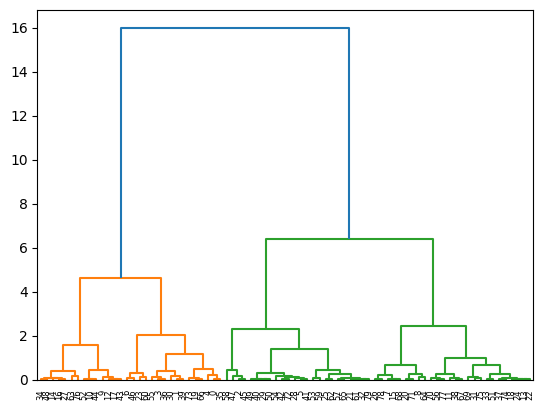

In [60]:
df = pd.read_csv("k_means_data.csv", index_col=0, delimiter=",")
dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))
n_clusters_hc = 4
hc = AgglomerativeClustering(n_clusters=n_clusters_hc, linkage='ward')
y_hc = hc.fit_predict(df)

kmean = KMeans(n_clusters=n_clusters_hc)
y_kmeans = kmean.fit_predict(df)


## Zadanie 5

Zaimplementuj samodzielnie **algorytm k-średnich** dla danych z pliku **k_means_data.csv**.

In [59]:
df = pd.read_csv("k_means_data.csv", index_col=0, delimiter=",")

def k_means(data, k, max_iter=100):
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    for i in range(max_iter):
        distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        new_centroids = np.array([data[labels == j].mean(axis=0) for j in range(k)])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

labels, centroids = k_means(df.values, k=4)

print("Labels:", labels)
print("Centroids:\n", centroids)

Labels: [2 2 3 2 2 3 2 1 1 1 1 0 1 0 2 1 2 1 0 2 1 3 0 2 0 3 0 2 3 3 2 0 3 0 2 2 2
 0 0 2 3 3 3 1 1 3 2 3 2 3 3 0 1 3 0 2 0 3 3 3 2 3 3 1 1 3 2 0 1 0 0 1 3 2
 0 0 1 0 0 3]
Centroids:
 [[3.41930758]
 [2.3126908 ]
 [0.83532973]
 [4.49489037]]


## Zadanie 6

1. Załaduj zbiór danych **iris**.
Opis zbioru: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
2. Narysuj wykres rozrzutu dla współrzędnych **sepal_length** i **sepal_width**. Oznacz różnymi
kolorami i marklami różne klasy kwiatów.
3. Znajdź wartości **minimalne, maksymalne** oraz **średnie odchylenie kwadratowe** dla atrybutów zbioru.
4. Policz **współczynniki korelacji** między atrybutami.
5. Zastosuj **algorytm k-średnich** i znajdź podział na klastry dla współrzędnych **sepal_length** i **sepal_width**.
6. Zastosuj **algorytm hierarchiczny aglomeracyjny** i znajdź podział na klastry dla współrzędnych **sepal_length** i **sepal_width**.

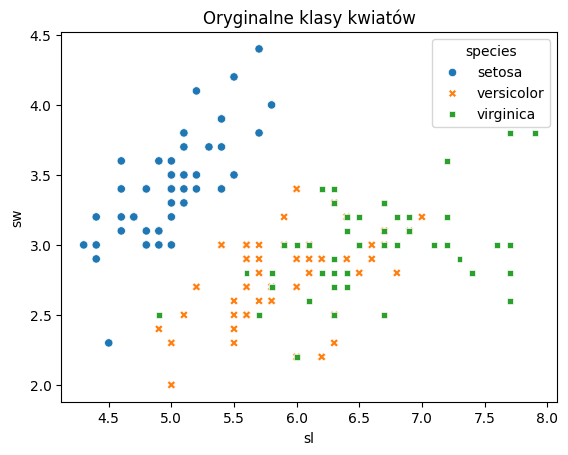

Statystyki:
            sl        sw        pl        pw
min  4.300000  2.000000  1.000000  0.100000
max  7.900000  4.400000  6.900000  2.500000
var  0.685694  0.189979  3.116278  0.581006

Korelacje:
           sl        sw        pl        pw
sl  1.000000 -0.117570  0.871754  0.817941
sw -0.117570  1.000000 -0.428440 -0.366126
pl  0.871754 -0.428440  1.000000  0.962865
pw  0.817941 -0.366126  0.962865  1.000000


ValueError: Could not interpret value `kmeans` for `hue`. An entry with this name does not appear in `data`.

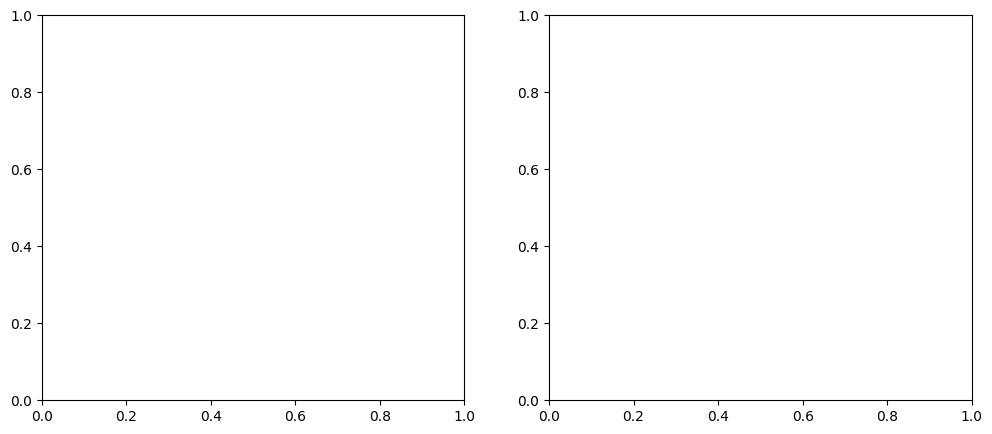

In [55]:
# Wczytanie zbioru danych Iris
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=['sl', 'sw', 'pl', 'pw'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

sns.scatterplot(data=df, x='sl', y='sw', hue='species', style='species')
plt.title("Oryginalne klasy kwiatów")
plt.show()

stats = df.drop(columns='species').agg(['min', 'max', 'var'])
print("Statystyki:\n", stats)
print("\nKorelacje:\n", df.drop(columns='species').corr())

X = df[['sl', 'sw']]
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

agg = AgglomerativeClustering(n_clusters=3)
df['agg'] = agg.fit_predict(X)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(data=df, x='sl', y='sw', hue='kmeans', ax=axes[0]).set_title('K-Means')
sns.scatterplot(data=df, x='sl', y='sw', hue='agg', ax=axes[1]).set_title('Hierarchical')
plt.show()


## Zadanie 7
Dla danych z pliku penguins.csv wykonaj polecenia

Wyświetl podstawowe informacje o zbiorze.
1. Sprawdź czy w zbiorze nie brakuje danych. Jeżeli są – usuń je ().
2. Ogranicz się do atrybutów **bill_length_mm** i **flipper_length_mm**.
3. Narysuj dendogram, zinterpretuj go i wyznacz ilość klastrów.
4. Zastosuj algorytm hierarchiczny aglomeracyjny do zbioru i wyznacz klastry.
5. Stwórz wykres rozrzutu z zaznaczonymi klastrami.

W **punktach 3-5** przetestuj różne sposoby obliczenia odległości między klastrami (linkage-complete, average, single, ward).

Dane z https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv

Wymiary zbioru: (344, 6)
<class 'pandas.core.frame.DataFrame'>
Index: 344 entries, Adelie to Gentoo
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   island             344 non-null    object 
 1   bill_length_mm     342 non-null    float64
 2   bill_depth_mm      342 non-null    float64
 3   flipper_length_mm  342 non-null    float64
 4   body_mass_g        342 non-null    float64
 5   sex                333 non-null    object 
dtypes: float64(4), object(2)
memory usage: 18.8+ KB
None
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         

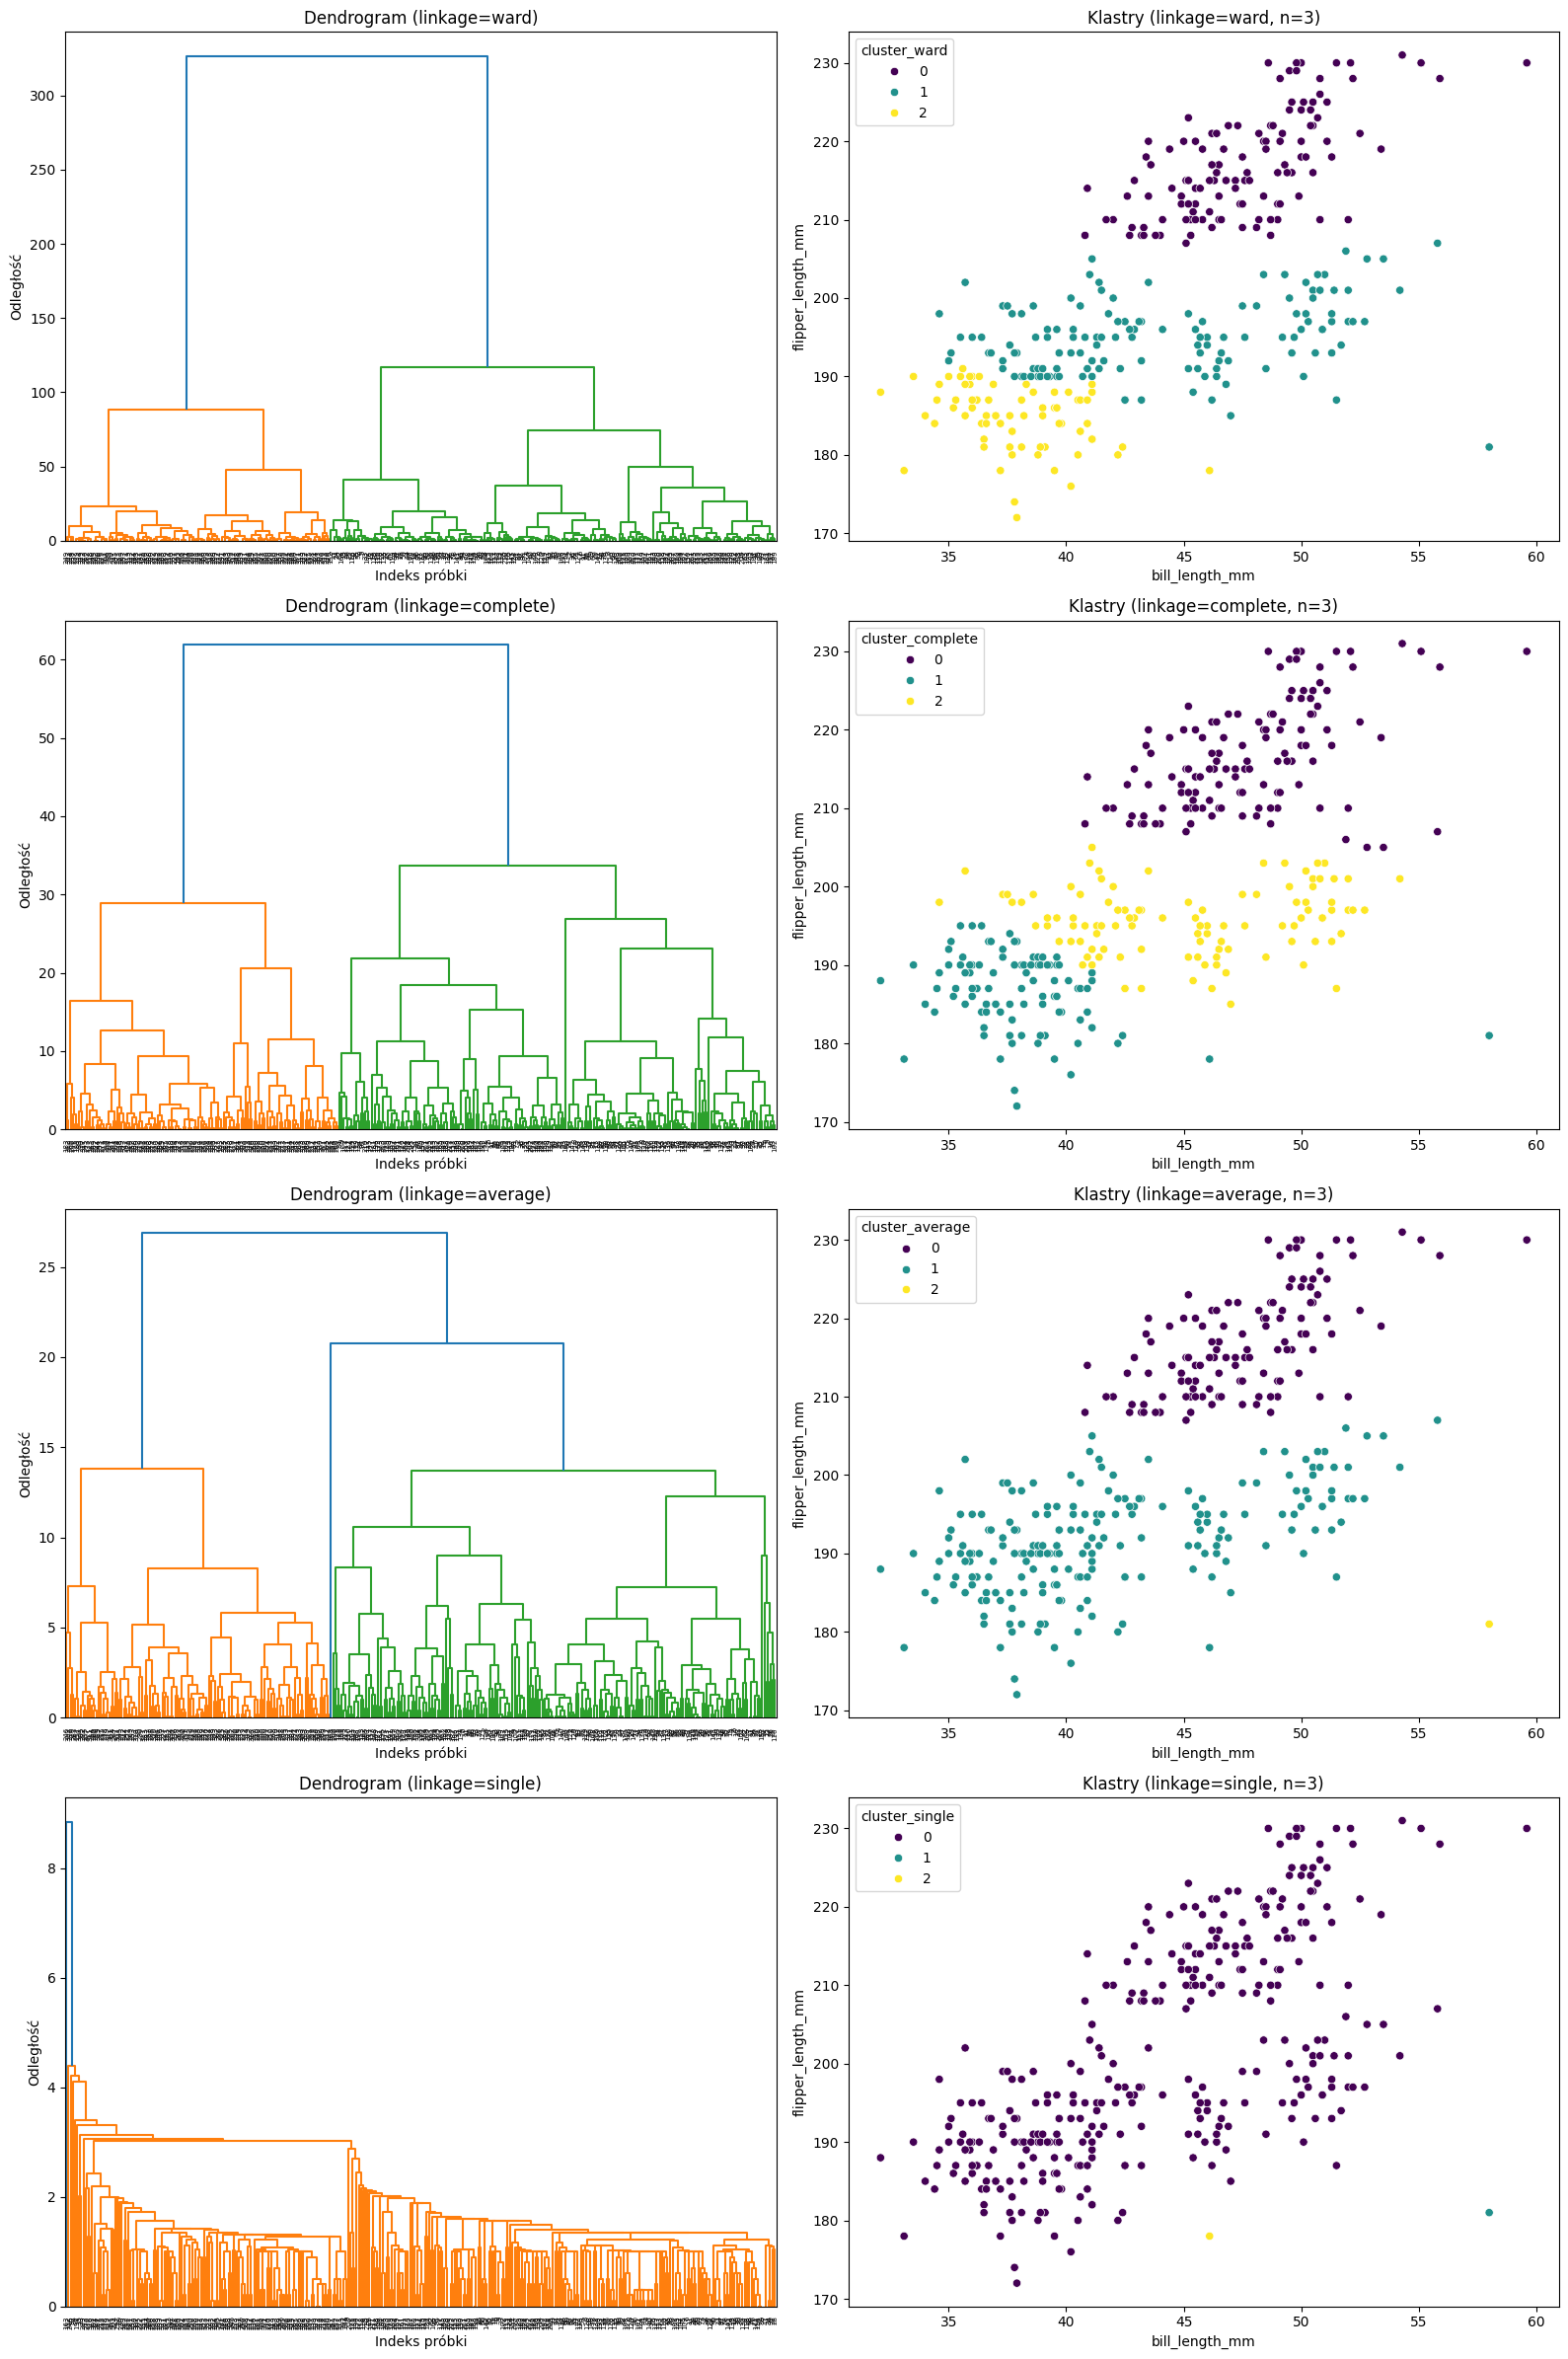

In [56]:
df = pd.read_csv("penguins.csv", index_col=0, delimiter=",")
print(f"Wymiary zbioru: {df.shape}")
print(df.info())
print(df.describe())

print("\nBrakujące dane przed usunięciem:\n", df.isnull().sum())
df = df.dropna().reset_index(drop=True)

X = df[['bill_length_mm', 'flipper_length_mm']]

methods = ['ward', 'complete', 'average', 'single']

fig, axes = plt.subplots(len(methods), 2, figsize=(16, 24))

for i, method in enumerate(methods):
    Z = linkage(X, method=method)
    dendrogram(Z, ax=axes[i, 0])
    axes[i, 0].set_title(f'Dendrogram (linkage={method})')
    axes[i, 0].set_xlabel('Indeks próbki')
    axes[i, 0].set_ylabel('Odległość')
    n_clusters = 3
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)
    df[f'cluster_{method}'] = model.fit_predict(X)

    sns.scatterplot(
        data=df,
        x='bill_length_mm',
        y='flipper_length_mm',
        hue=f'cluster_{method}',
        palette='viridis',
        ax=axes[i, 1]
    )
    axes[i, 1].set_title(f'Klastry (linkage={method}, n=3)')

plt.tight_layout()
plt.show()

In [46]:
df

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...
Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
